## PCA for Regression
https://365datascience.com/tutorials/python-tutorials/pca-k-means/
- Data leakage initially, PCA actually not improving the model
- Good to have as analysis, but we don't use PCA in our final model (sampling regression)

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans


from xgboost import XGBRegressor

In [66]:
## do not include Popularity in the PCA analysis
df = pd.read_csv("data/dataModel.csv")
popularity_col = df.Popularity
df = df.drop("Popularity", axis=1)
df.dropna(inplace=True)

In [67]:
# popularity_col

In [68]:
scaler = StandardScaler()
imputer = IterativeImputer(n_nearest_features=10)

df_imp = imputer.fit_transform(df)
df_std = scaler.fit_transform(df_imp)

In [69]:
pca = PCA(n_components=14)
pca.fit(df_std)

PCA(n_components=14)

In [70]:
pca.explained_variance_ratio_
pd.DataFrame(pca.components_.T, columns=["comp1", "comp2", "comp3", "comp4", "comp5",
                                         "comp6", "comp7", "comp8", "comp9", "comp10",
                                         "comp11", "comp12", "comp13", "comp14"],
             index=df.columns.values)

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,comp14
ArtistName,-0.019978,0.022087,-0.072094,0.024606,0.034366,0.233246,-0.817249,0.415464,0.294042,-0.088713,-0.026135,-0.028706,-0.022322,0.012683
KeySignatureConfidence,0.031918,-0.062998,-0.379670,-0.255469,0.119642,-0.049231,0.380514,0.484040,0.294752,-0.130771,0.276685,-0.053134,-0.386950,-0.232231
TimeSignatureConfidence,0.010659,-0.009894,0.355453,0.009221,0.464735,-0.482427,-0.062037,0.282562,-0.196202,-0.168191,-0.292955,0.008453,0.079850,-0.402822
Year,-0.051791,0.208556,-0.075492,-0.032650,-0.171335,-0.586312,-0.167573,-0.331629,0.351087,-0.460533,0.275469,0.121935,0.060729,0.060735
danceability,-0.179634,-0.535543,0.331055,-0.188723,0.103078,0.021261,-0.036491,-0.056164,0.029454,-0.082761,0.244739,0.082461,0.045530,0.006222
energy,-0.536047,0.203332,-0.026983,0.074630,0.028489,0.046485,-0.008836,-0.018009,-0.030478,0.144952,0.085475,0.084505,-0.079303,-0.076344
key,-0.045569,0.028898,0.286805,0.061901,-0.575407,-0.025219,0.189185,0.429681,0.076522,-0.076949,-0.212010,0.544875,0.044383,0.053948
loudness,-0.503826,0.095703,-0.116386,0.024362,0.034994,-0.148380,0.010831,0.085490,-0.023626,0.239319,-0.039132,-0.013091,-0.017734,-0.013062
mode,0.049837,-0.117366,-0.474373,-0.054375,0.404713,0.048439,-0.033136,-0.117952,-0.071439,-0.042064,-0.191417,0.706728,0.111085,0.134177
speechiness,-0.060813,-0.163036,0.187218,0.590443,0.184124,0.060878,0.027773,-0.045183,-0.037587,-0.260429,0.079019,0.086500,-0.604748,0.265981


Text(0.5, 1.0, 'Explained Variance by Components')

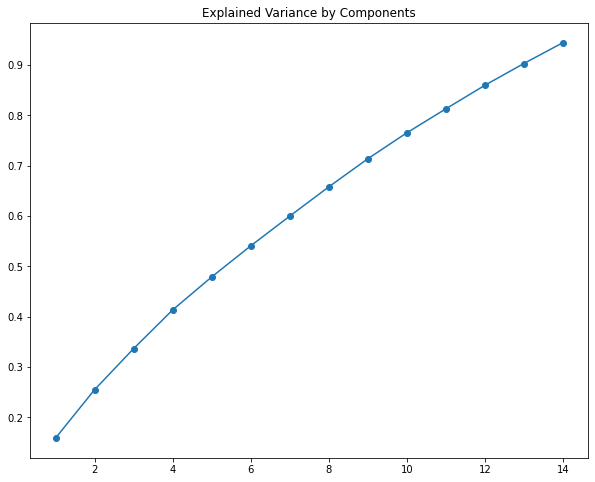

In [71]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker="o")
plt.title("Explained Variance by Components")

In [72]:
pca_scores = pca.transform(df_std)

wcss = []

for i in range(1, 21, 1):
    kmeans_pca = KMeans(n_clusters=i, random_state=699)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

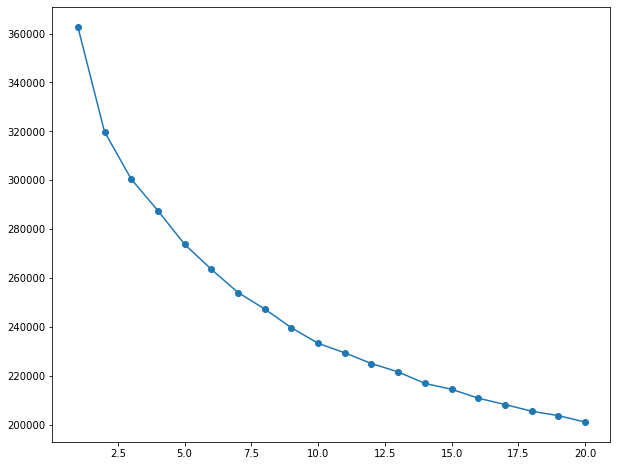

In [73]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker="o")

In [74]:
kmeans_pca = KMeans(n_clusters=14, random_state=699)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=14, random_state=699)

In [75]:
df_pca_means = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_pca_means.columns.values[-14:] = ["component1", "component2", "component3", "component4",
                                     "component5", "component6", "component7", "component8",
                                     "component9", "component10", "component11", "component12",
                                     "component13", "component14"]

df_pca_means["segment"] = kmeans_pca.labels_

/opt/anaconda3/envs/MSD/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


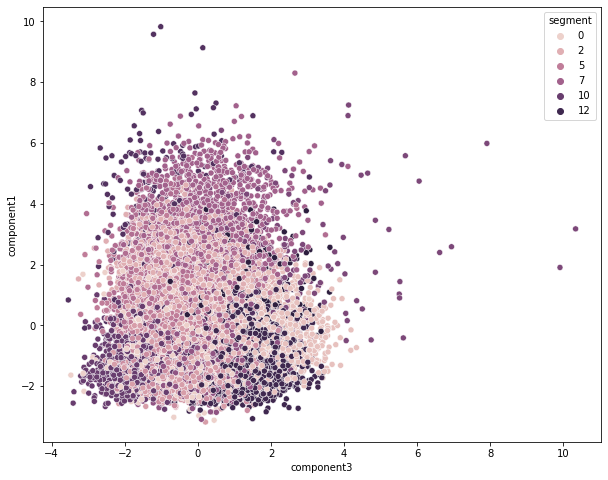

In [77]:
x_axis = df_pca_means["component3"]
y_axis = df_pca_means["component1"]

plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_means.segment);

In [78]:
df_pca_means["Popularity"] = popularity_col
df_pca_means

,ArtistName,KeySignatureConfidence,TimeSignatureConfidence,Year,danceability,energy,key,loudness,mode,speechiness,...,component7,component8,component9,component10,component11,component12,component13,component14,segment,Popularity
0,10694,0.838,0.256,1989.0,0.537,0.810,8.0,-6.213,0.0,0.1290,...,-0.597403,0.294835,0.498676,-0.643064,1.251732,0.162197,-2.051431,-1.449378,8,17.0
1,4528,0.955,0.867,0.0,0.342,0.377,11.0,-13.728,1.0,0.0401,...,1.350463,2.422994,-0.371398,1.125306,0.284154,1.243192,-0.052687,-0.388296,6,1.0
2,3297,0.056,0.748,0.0,0.663,0.614,2.0,-7.712,1.0,0.2490,...,0.107741,-1.362490,-0.537401,1.501451,-1.149261,0.145932,-0.617279,-0.169514,4,0.0
3,4435,0.740,1.000,0.0,0.163,0.262,1.0,-9.781,1.0,0.0306,...,0.881369,0.631202,-1.485241,-0.751623,-1.754288,-1.194765,-0.342610,-0.632231,2,26.0
4,4319,0.673,0.582,0.0,0.262,0.753,9.0,-11.859,1.0,0.0987,...,1.850009,0.980471,0.199046,-0.127723,-1.537060,0.321101,0.457094,-1.208715,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22595,4799,0.457,1.000,2007.0,0.587,0.859,7.0,-4.793,1.0,0.0619,...,0.179186,0.153636,-0.800457,-0.720066,-0.800499,0.628237,-0.090921,0.072545,3,6.0
22596,5605,0.046,0.043,1993.0,0.367,0.646,3.0,-8.317,0.0,0.1310,...,-0.330695,-1.644329,-0.117995,-0.188242,0.131268,-1.470202,0.350997,0.109639,8,2.0
22597,7480,0.288,1.000,2000.0,0.526,0.791,1.0,-3.553,1.0,0.4280,...,-0.904536,-0.933820,-0.095074,-0.073881,-0.209559,0.323878,-1.938774,0.696250,3,52.0
22598,1251,0.107,0.428,2005.0,0.197,0.974,6.0,-4.609,0.0,0.2070,...,1.150400,-1.298086,-0.368766,-0.452098,0.031793,-0.390013,-0.483021,0.087519,8,20.0


In [79]:
# df_pca_means.to_csv("data/dataModelPCA+KMeans.csv", index = False)